<h1 style="color:green;">Kaggle Competiton</h1>

<h5>Name: Abdelrahman Naser Abu Naser</h5>
<h5>ID: 160825</h5>
<h5>Kaggle name: Abdelrahman Abu Naser</h5>
<h5>Kaggle score: 0.94785 (5th place)</h5>

<h3 style="color:red;">Importing the libraries needed for the model</h3>

In [1]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import learning_curve

<h3 style="color:red;">Loading the databases and the sample</h3>

In [2]:
train_path = "spambase_train.csv"
test_path = "spambase_test.csv"
sample_submission_path = 'sample_submission.csv'

train_df = pd.read_csv(train_path)
test_df = pd.read_csv(test_path)
submission_df = pd.read_csv(sample_submission_path)

<h3 style="color:red;">Using a dictionary to make it easier for editing the hyperparameters and features</h3>
<h5 style="color:green;">Features:</h5><h5>I used all the features except the ID column (it is not used for training) and the spam column (used it for the target). The RFC chooses the best features on it's own and the training time was fast, so I didn't use any feature selection/engineering methods.</h5>

In [3]:
config = {
    "features": ["word_freq_make","word_freq_address","word_freq_all","word_freq_3d","word_freq_our","word_freq_over","word_freq_remove","word_freq_internet",
                 "word_freq_order","word_freq_mail","word_freq_receive","word_freq_will","word_freq_people","word_freq_report","word_freq_addresses",
                 "word_freq_free","word_freq_business","word_freq_email","word_freq_you","word_freq_credit","word_freq_your","word_freq_font","word_freq_000",
                 "word_freq_money","word_freq_hp","word_freq_hpl","word_freq_george","word_freq_650","word_freq_lab","word_freq_labs", "word_freq_telnet",
                 "word_freq_857","word_freq_data","word_freq_415","word_freq_85","word_freq_technology","word_freq_1999","word_freq_parts","word_freq_pm",
                 "word_freq_direct","word_freq_cs","word_freq_meeting","word_freq_original","word_freq_project","word_freq_re", "word_freq_edu","word_freq_table",
                 "word_freq_conference","char_freq_;","char_freq_(", "char_freq_[", "char_freq_!","char_freq_$","char_freq_#","capital_run_length_average",
                 "capital_run_length_longest", "capital_run_length_total"],
    "target": "spam",
# The hyperparameters (the most important part)
# Kept changing them until i got the best result
# Didn't use any methods since they took too long and it was mostly the "n_estimators" and the "max_features" that had an affect on increasing the performance of the model.
    "n_estimators": 500,
    "max_depth": None,
    "min_samples_split": 2,
    "min_samples_leaf": 1,
    "max_features": 6,
    "bootstrap": True,
    "random_state": 20,
    "n_jobs": -1
}

<h3 style="color:red;">Functions:</h3>
<h4 style="color:green;">The model</h4>

In [4]:
def random_forest_model(df):
    
    feature_columns = config["features"]
    X = df[feature_columns].to_numpy()
    y = df[config["target"]]

    model = RandomForestClassifier(
        n_estimators=config["n_estimators"],
        max_depth=config["max_depth"],
        min_samples_split=config["min_samples_split"],
        min_samples_leaf=config["min_samples_leaf"],
        max_features=config["max_features"],
        bootstrap=config["bootstrap"],
        random_state=config["random_state"],
        n_jobs=config["n_jobs"]
    )
    
    model.fit(X, y)
    return model

<h4 style="color:green;">Prediction and updating the file</h4>

In [5]:
def RFC_pred(df):
    feature_columns = config["features"]
    X = df[feature_columns].to_numpy()
    y = model.predict(X)

    # Update the "spam" column in submission_df based on the id
    submission_df.set_index('ID', inplace=True)
    df.set_index('ID', inplace=True)
    submission_df.loc[df.index, 'spam'] = y

    # Save the updated DataFrame to a new CSV file
    updated_submission_path = 'Result.csv'
    submission_df.to_csv(updated_submission_path)

    print(f"Updated submission file saved to: {updated_submission_path}")
    

<h4 style="color:green;">Feature importance</h4>

In [6]:
def plot_feature_importance():
    features = config["features"]
    importance = model.feature_importances_
    indices = np.argsort(importance)
    plt.figure(figsize=(12, 8))
    plt.title('Feature Importance')
    plt.barh(range(len(indices)), importance[indices], color='b', align='center')
    plt.yticks(range(len(indices)), [features[i] for i in indices])
    plt.xlabel('Relative Importance')
    plt.show()

<h4 style="color:green;">Learning curve (how the score incrases throughout training)</h4>

In [7]:
def plot_learning_curve(df):
    feature_columns = config["features"]
    X = df[feature_columns].to_numpy()
    y = df[config["target"]]

    train_sizes, train_scores, test_scores = learning_curve(model, X, y, cv=5, n_jobs=-1, train_sizes=np.linspace(0.1, 1.0, 10))
    train_scores_mean = np.mean(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    
    plt.figure(figsize=(10, 7))
    plt.plot(train_sizes, train_scores_mean, 'o-', color='r', label='Training score')
    plt.plot(train_sizes, test_scores_mean, 'o-', color='g', label='Cross-validation score')
    plt.title('Learning Curve')
    plt.xlabel('Training examples')
    plt.ylabel('Score')
    plt.legend(loc='best')
    plt.grid()
    plt.show()

<h4 style="color:green;">Prediction destribution</h4>

In [8]:
def plot_prediction_distribution(df):
    feature_columns = config["features"]
    X = df[feature_columns].to_numpy()
    y = model.predict(X)
    
    plt.figure(figsize=(10, 7))
    sns.histplot(y, kde=True, bins=30)
    plt.title('Prediction Distribution')
    plt.xlabel('Predicted Value')
    plt.ylabel('Frequency')
    plt.show()

<h3 style="color:red;">Running the model and Analysis</h3>

In [9]:
model = random_forest_model(train_df)

In [10]:
RFC_pred(test_df)

Updated submission file saved to: Result.csv


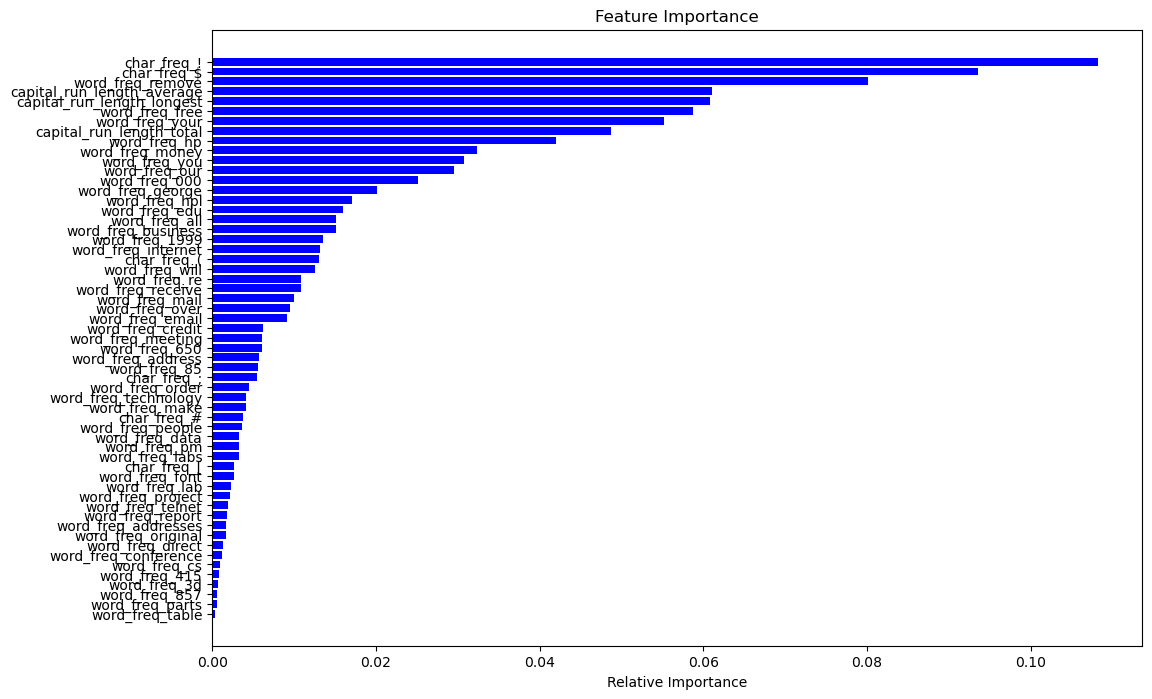

In [11]:
plot_feature_importance()

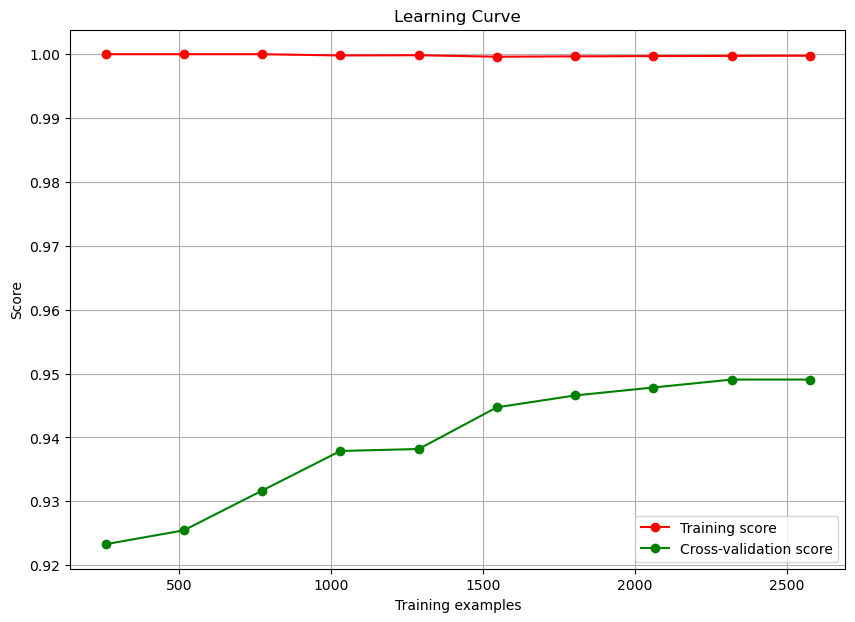

In [12]:
plot_learning_curve(train_df)

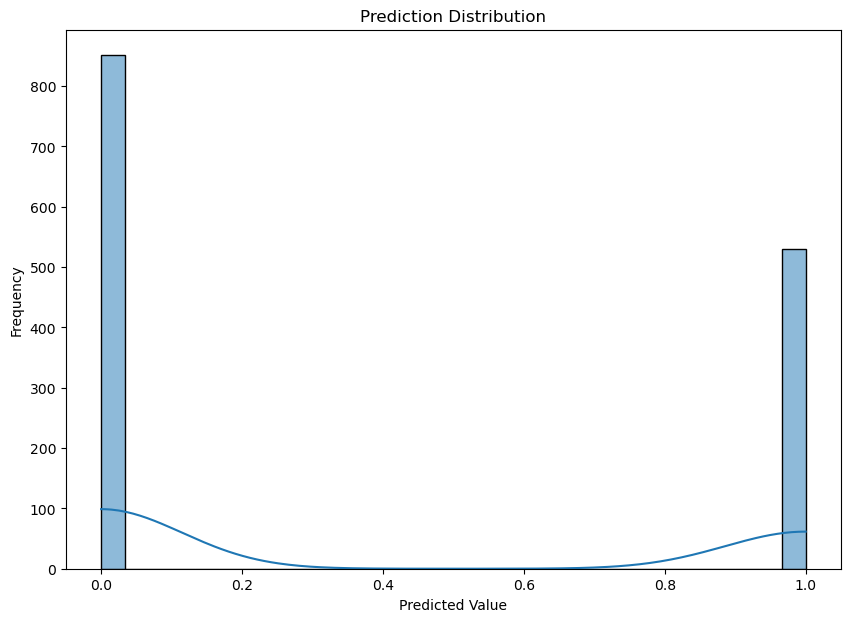

In [13]:
plot_prediction_distribution(test_df)